In [17]:
from neural_circuits.LRRNN import get_W_eigs_tf
from epi.models import Model, Parameter
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import argparse



N = 2
r = 2
g = 0.01
K = 1

# 1. Define model: dxd matrix
D = int(N*r)

# Set up the bound vectors.
lb = -np.ones((D,))
ub = np.ones((D,))

# Define the parameter A.
U = Parameter("U", D, lb=lb, ub=ub)
V = Parameter("V", D, lb=lb, ub=ub)
parameters = [U, V]

# Define the model matrix.
model = Model("Rank2Net", parameters)

W_eigs = get_W_eigs_tf(g, K)
def stable_amp(U, V):
    U = tf.reshape(U, (-1, N, 2))
    V = tf.reshape(V, (-1, N, 2))
    T_x = W_eigs(U, V)
    return T_x

model.set_eps(stable_amp)
epi_df = model.get_epi_df()

print(epi_df)

     Unnamed: 0  k  iteration         H      cost  converged        R1  \
0             0  0          0  4.470061 -0.496161        NaN -0.311387   
1             1  1         50  4.919251 -4.044011        NaN -0.015108   
2             2  1        100  4.804316 -4.114613        NaN  0.042613   
3             3  1        150  5.179339 -4.428183        NaN  0.031555   
4             4  1        200  5.227693 -4.395838        NaN -0.041631   
..          ... ..        ...       ...       ...        ...       ...   
116         116  6       5800 -5.122046  5.055549        NaN -0.028599   
117         117  6       5850 -5.213767  4.845725        NaN -0.014854   
118         118  6       5900 -4.513476  4.805833        NaN  0.022905   
119         119  6       5950 -4.470369  4.600647        NaN -0.050072   
120         120  6       6000 -4.056016  5.067442        1.0  0.014400   

           R2        R3        R4  \
0   -1.238888  0.093242  1.527547   
1   -0.910126  0.130196  0.951300   


<AxesSubplot:xlabel='iteration'>

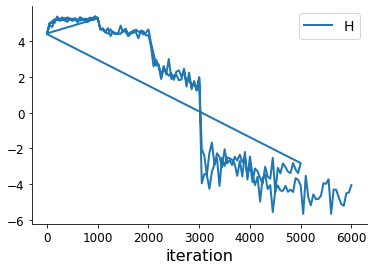

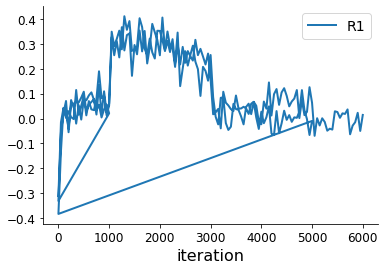

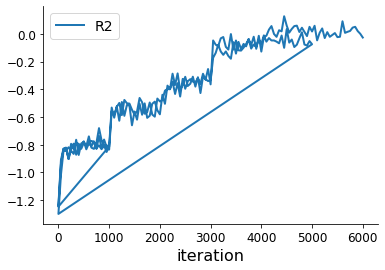

In [16]:

epi_df.plot('iteration', 'H')
epi_df.plot('iteration', 'R1')
epi_df.plot('iteration', 'R2')


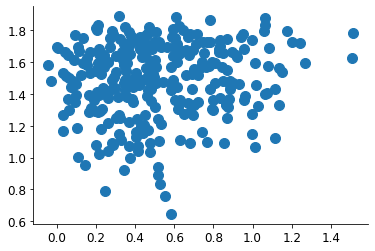

In [14]:
import matplotlib.pyplot as plt
M = 300
row = epi_df.iloc[-1]
dist = model.get_epi_dist(row)
z = dist.sample(M)
log_prob = dist.log_prob(z)
T = model.eps(z)
plt.scatter(T[:,0], T[:,1])
        